# Day 19 - Bivariate Stats: Categorical to Categorical

A categorical-to-categorical context uses visualization before analysis. How do you visualize two categorical variables when there is no ordering to the values, as there is with numeric variables? We cannot calculate means, std, skew, kurt, or any of the measures we have used so far. The primary measure of categorical values is their count across values. We will learn to visualize this in two ways:
- Count-based charts
- CrossTab (or Contingency Table) with heatmap

### Count-based Categorical Charts in Seaborn

Because we can count categorical groups, we can make some use of bar charts.

In [1]:
import pandas as pd

df = pd.read_csv('data/lc_small.csv')
df.head()

,loan_status,loan_status_numeric,loan_amnt,issue_d,term,int_rate,installment,total_pymnt,total_rec_prncp,total_rec_int,...,pub_rec,revol_bal,revol_util,tot_coll_amt,tot_cur_bal,total_acc,total_rev_hi_lim,dti,grade,sub_grade
0,Fully Paid,6,5500,2017-11-01,36 months,7.35,170.71,5869.266021,5500.00,369.27,...,0.0,7492,22.6,0.0,7492.0,9.0,33200.0,2.31,A,A4
1,Current,5,20000,2017-02-01,60 months,14.99,475.70,11375.160000,6275.78,5099.38,...,0.0,21482,64.5,0.0,29091.0,19.0,33300.0,16.03,C,C4
2,Current,5,25000,2018-11-01,36 months,7.02,772.16,2306.730000,1888.74,417.99,...,0.0,36104,39.3,0.0,567211.0,32.0,91900.0,17.63,A,A2
3,Current,5,16800,2018-07-01,36 months,15.02,582.55,4000.750000,2704.99,1295.76,...,0.0,29854,100.2,0.0,780426.0,8.0,29800.0,19.51,C,C3
4,Current,5,31300,2018-09-01,60 months,27.27,960.82,4709.260000,1305.65,3403.61,...,0.0,11301,45.9,0.0,494372.0,50.0,24600.0,50.55,E,E5


In [2]:
pd.DataFrame({'Count':df.count(), 
            '% Missing':round(df.isnull().sum()/len(df)*100, 2),
            'Unique':df.nunique(),
            'Type':df.dtypes})

,Count,% Missing,Unique,Type
loan_status,10476,0.00,6,object
loan_status_numeric,10476,0.00,6,int64
loan_amnt,10476,0.00,775,int64
issue_d,10476,0.00,35,object
term,10476,0.00,2,object
int_rate,10476,0.00,206,float64
installment,10476,0.00,5961,float64
total_pymnt,10476,0.00,10203,float64
total_rec_prncp,10476,0.00,7565,float64
total_rec_int,10476,0.00,10109,float64


The primary label in this dataset is loan_status. If we can explain what causes a loan to be Fully Paid versus Charged Off, then we can help loan officers make better decisions about what terms to offer borrowers to get more grade A loans. Almost every borrower profile has an interest rate at which the loan could be profitable. We simply need to help that decision maker know who is more or less likely to pay off a loan based on the borrower’s credit report and personal information.

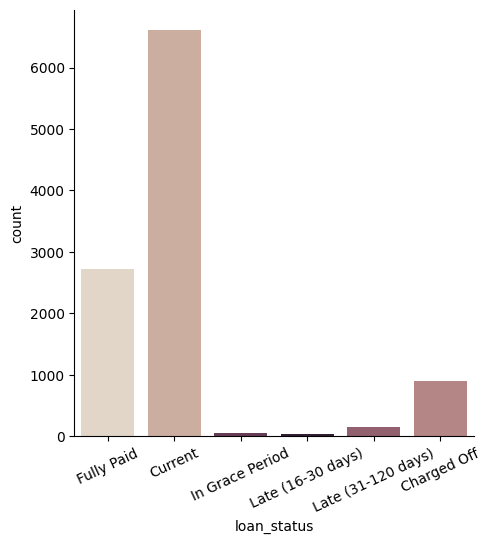

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
viz = sns.catplot(x="loan_status", kind="count", hue='loan_status', palette="ch:.25", data=df,
                order=['Fully Paid', 'Current', 'In Grace Period', 'Late (16-30 days)', 'Late (31-120 days)', 'Charged Off']);
viz.set_xticklabels(rotation=25);

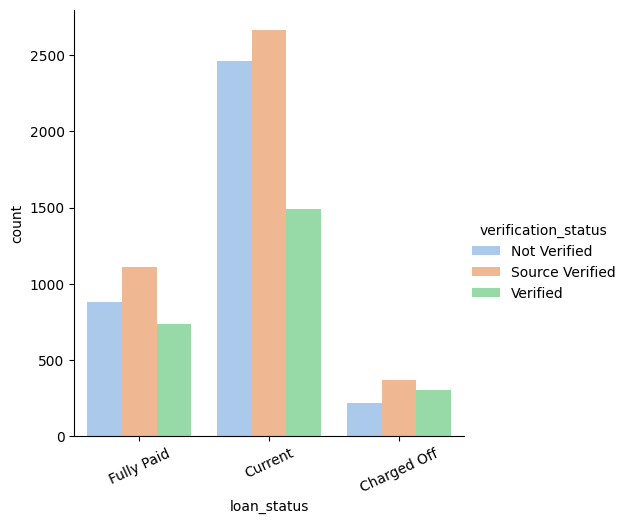

In [6]:
viz = sns.catplot(x="loan_status", hue="verification_status",
                kind="count", palette="pastel", data=df,
                order=['Fully Paid', 'Current', 'Charged Off']);
viz.set_xticklabels(rotation=25);

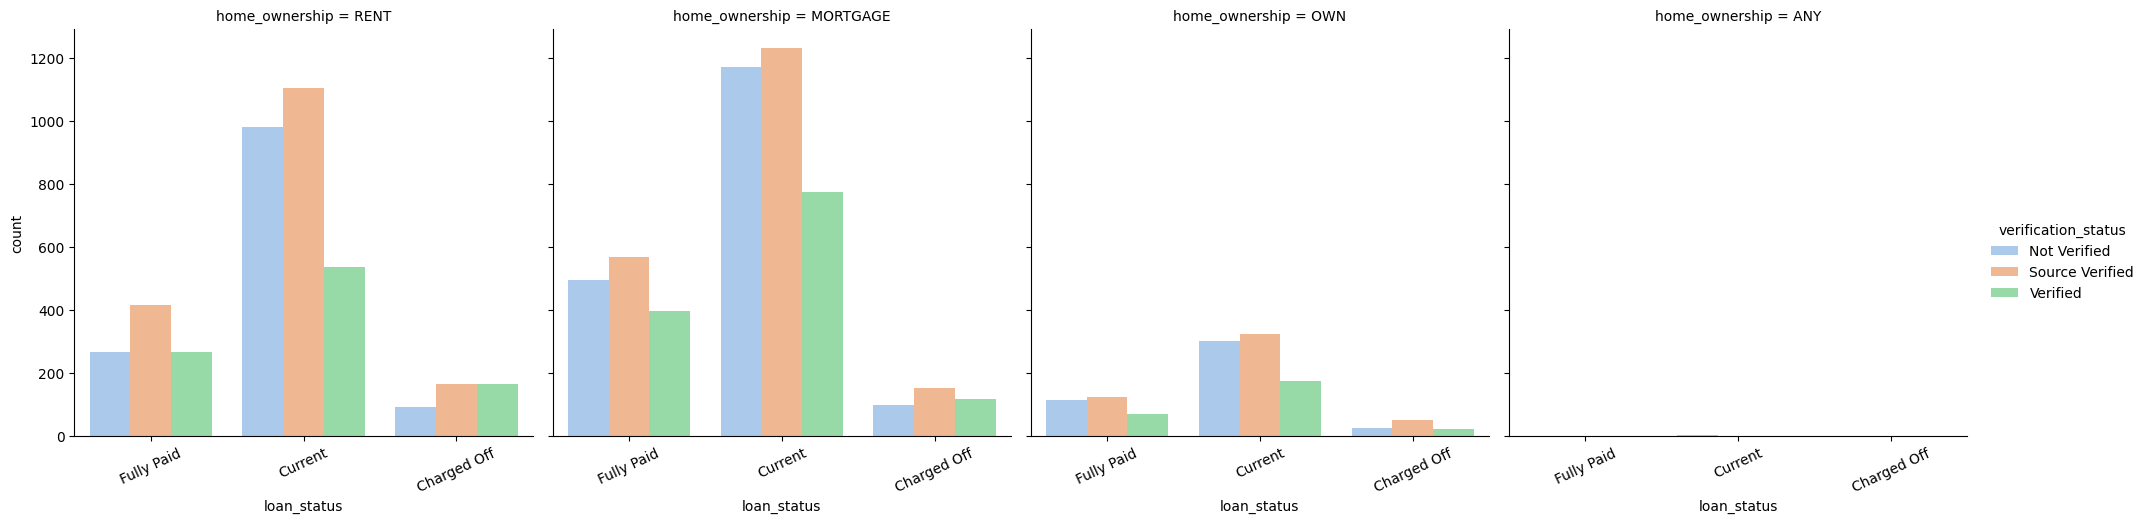

In [7]:
viz = sns.catplot(x="loan_status", hue="verification_status", col="home_ownership",
                kind="count", palette="pastel", data=df,
                order=['Fully Paid', 'Current', 'Charged Off']);
viz.set_xticklabels(rotation=25);

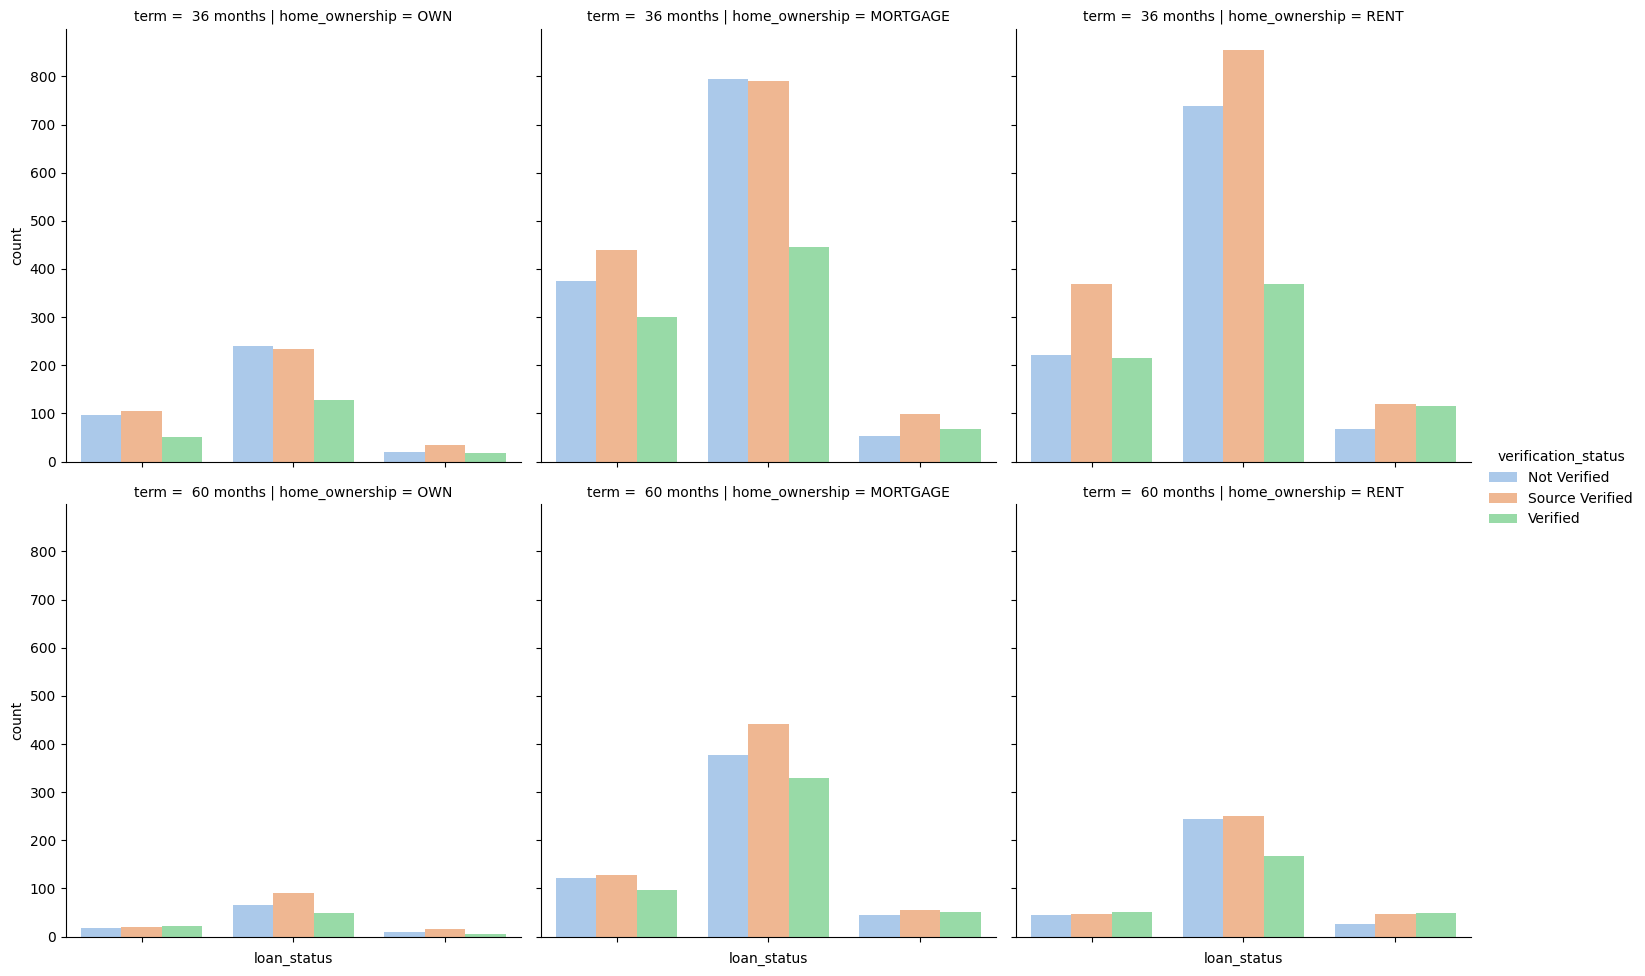

In [8]:
viz = sns.catplot(x="loan_status", hue="verification_status", 
                col="home_ownership", row="term",
                kind="count", palette="pastel", data=df,
                order=['Fully Paid', 'Current', 'Charged Off'],
                col_order=['OWN', 'MORTGAGE', 'RENT'],);
viz.set_xticklabels(rotation=25);

### Crosstab and Heatmap

CrossTab is a very powerful descriptive data analysis object in the Pandas package that is much like a PivotTable in Microsoft Excel. We will use it to summarize a table of categorical group counts.

In [9]:
pd.crosstab(df['loan_status'], df['verification_status'])

verification_status,Not Verified,Source Verified,Verified
loan_status,,,
Charged Off,220,372,306
Current,2462,2663,1487
Fully Paid,878,1108,736
In Grace Period,11,28,17
Late (16-30 days),12,10,14
Late (31-120 days),41,55,56


We can enhance a CrossTab using the Seaborn heatmap() object that assigns a color from a gradient scale to each cell based on the count value:

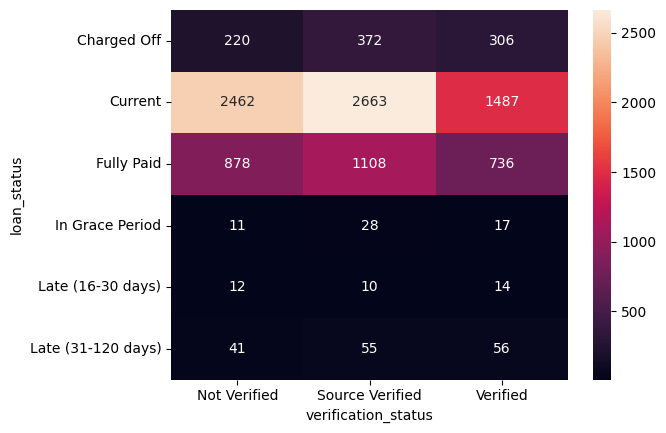

In [10]:
sns.heatmap(pd.crosstab(df.loan_status, df.verification_status), annot=True, fmt='d');

Notice that many of the cells are black. That is because the count of borrowers who are In Grace Period or Late is very small compared to Charged Off, Current, or Fully Paid. Let’s do something about this. There are two options: (1) we can reassign, or bin, categorical values with small counts into the same category as groups with larger counts, or (2) we can delete the records of those with small counts. Let’s do a combination of both, based on the meaning of each group. For example, those in the grace period are technically not late yet. They are simply taking some extra time to pay. Since those borrowers are not clearly either late or current, let’s delete them. Those who are late 16 days or more will be binned with Charged Off borrowers:

In [12]:
# Delete "In Grace Period" records
df.drop(df[df.loan_status == "In Grace Period"].index, inplace=True)

# Check to make sure they're gone:
df.loan_status.unique()

array(['Fully Paid', 'Current', 'Charged Off', 'Late (31-120 days)',
       'Late (16-30 days)'], dtype=object)

In [13]:
# Bin 'Late (16-30 days)' and 'Late (31-120 days)' with 'Charged Off
df.loan_status.replace({'Late (16-30 days)':'Charged Off', 'Late (31-120 days)':'Charged Off'}, inplace=True)

# Check to make sure they're gone:
df.loan_status.unique()

array(['Fully Paid', 'Current', 'Charged Off'], dtype=object)

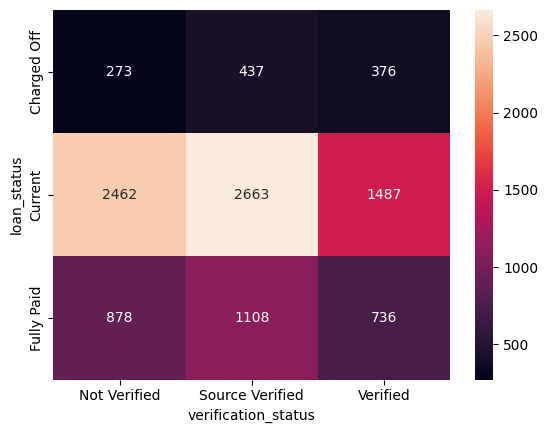

In [14]:
crosstab = pd.crosstab(df['loan_status'], df['verification_status'])
sns.heatmap(crosstab, annot=True, fmt='d');

### Pearson's Chi Squared

Now you know how to visualize categorical data. But how do we analyze the effect size of a relationship between two categorical features or a feature and a label? Pearson’s Chi-Square test is used to determine whether there is a relationship between two categorical variables. Unlike Pearson correlation, which is a signed (+ or -) number indicating directional relationships, chi-square is based on the difference between the expected frequencies and the observed frequencies in one or more categories.

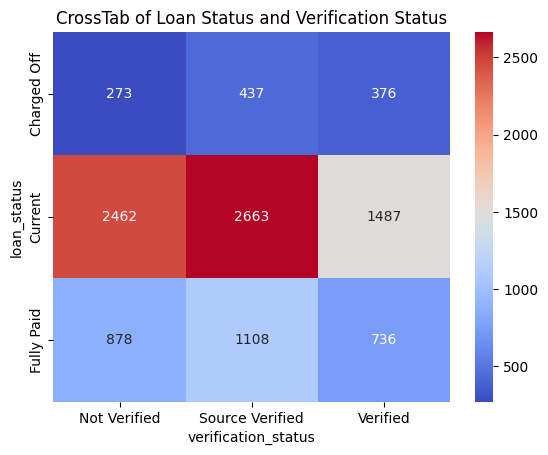

In [15]:
crosstab = pd.crosstab(df['loan_status'], df['verification_status'])
plt.title('CrossTab of Loan Status and Verification Status')
sns.heatmap(crosstab, annot=True, fmt='d', cmap='coolwarm');

X square:	107.2231
p-value:	0.0
DoF:		4



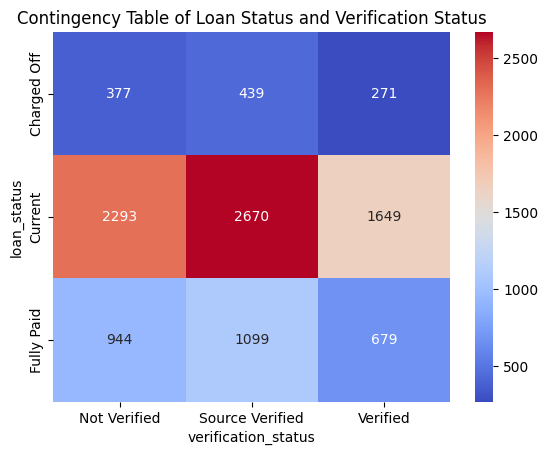

In [16]:
import numpy as np
from scipy.stats import chi2_contingency
from scipy.stats import chi2

X, p, dof, contingency_table = chi2_contingency(crosstab)

print(f'X square:\t{round(X, 4)}')
print(f'p-value:\t{round(p, 10)}')
print(f'DoF:\t\t{dof}\n')

#We are adding the contingency table to a DataFrame that we then display 
#in a Seaborn heatmap. 
# This is unnecessary for getting the X2 state, 
# but it may be interesting to review:

ct_df = pd.DataFrame(np.rint(contingency_table).astype('int64'), columns=crosstab.columns, index=crosstab.index)
plt.title('Contingency Table of Loan Status and Verification Status')
sns.heatmap(ct_df, annot=True, fmt='d', cmap='coolwarm');

In [18]:
contingency_table

array([[ 376.55642994,  438.56890595,  270.87466411],
       [2292.62533589, 2670.18195777, 1649.19270633],
       [ 943.81823417, 1099.24913628,  678.93262956]])

In [43]:
ct_df

verification_status,Not Verified,Source Verified,Verified
loan_status,,,
Charged Off,377,439,271
Current,2293,2670,1649
Fully Paid,944,1099,679


### Binning Numeric Features

As you have learned, the Pearson chi-square statistic (X2) is used when the label is categorical. However, it can be a problem if the feature is numeric and continuous because each unique value is treated as an independent, unordered categorical group. As a result, you may end up with many groups—so many that you will not have enough cases per group to satisfy the minimum requirements for X2 (5 cases normally). For example, see what happens when we create a CrossTab of the features loan_amnt (a discrete feature, but with so many values that it replicates a continuous feature) and loan_status:

In [15]:
crosstab_df = pd.DataFrame(pd.crosstab(df['loan_amnt'], df['loan_status'])) # Generate the contingency table
crosstab_df

loan_status,Charged Off,Current,Fully Paid
loan_amnt,,,
1000,3,28,27
1100,0,2,0
1175,0,1,0
1200,1,6,6
1300,0,2,1
...,...,...,...
39000,0,1,1
39600,0,0,1
39675,0,1,0


In [19]:
from scipy import stats

# Step 1. Check to see if any value in the contingeny table is less than 5
flag = False              # Start by creating a variable to indicate (True/False) whether any value is below 5
crosstab_df = pd.DataFrame(pd.crosstab(df['loan_amnt'], df['loan_status'])) # Generate the contingency table
for col in crosstab_df:
  if crosstab_df[col].min() < 5: # Use the min() funtion to get the lowest value in the DataFrame
    flag = True             # If the min is less than 5, then flag it as 'True'
    break                   # No need to keep looping if there is a problem with any group min

if flag: # If at least one of the values was less than 5, then bin into 10 ranges
  # Step 2. Determine what the cutoff value is for each of the 10 buckets
  q1 = np.quantile(df['loan_amnt'], .10)
  q2 = np.quantile(df['loan_amnt'], .20)
  q3 = np.quantile(df['loan_amnt'], .30)
  q4 = np.quantile(df['loan_amnt'], .40)
  q5 = np.quantile(df['loan_amnt'], .50)
  q6 = np.quantile(df['loan_amnt'], .60)
  q7 = np.quantile(df['loan_amnt'], .70)
  q8 = np.quantile(df['loan_amnt'], .80)
  q9 = np.quantile(df['loan_amnt'], .90)

  # Step 3. Iterate through the feature to be binned and convert each value to the quartile cutoff using the
  # .itertuples() method of Pandas DataFrames which allows us to loop through ever row one-at-a-time.
  for row in df.itertuples(): 
    if row.loan_amnt < q1:
      df.loc[row.Index, 'loan_amnt'] = q1 
    elif row.loan_amnt >= q1 and row.loan_amnt < q2:
      df.loc[row.Index, 'loan_amnt'] = q2
    elif row.loan_amnt >= q2 and row.loan_amnt < q3:
      df.loc[row.Index, 'loan_amnt'] = q3
    elif row.loan_amnt >= q3 and row.loan_amnt < q4:
      df.loc[row.Index, 'loan_amnt'] = q4
    elif row.loan_amnt >= q4 and row.loan_amnt < q5:
      df.loc[row.Index, 'loan_amnt'] = q5
    elif row.loan_amnt >= q5 and row.loan_amnt < q6:
      df.loc[row.Index, 'loan_amnt'] = q6
    elif row.loan_amnt >= q6 and row.loan_amnt < q7:
      df.loc[row.Index, 'loan_amnt'] = q7
    elif row.loan_amnt >= q7 and row.loan_amnt < q8:
      df.loc[row.Index, 'loan_amnt'] = q8
    elif row.loan_amnt >= q8 and row.loan_amnt < q9:
      df.loc[row.Index, 'loan_amnt'] = q9
    else:
      df.loc[row.Index, 'loan_amnt'] = df['loan_amnt'].max()
  
  # Step 4. Use the new list (actually a DataFrame of one column) in place of the raw data to create the new contingency table
  contingency_table = pd.crosstab(df['loan_amnt'], df['loan_status'])

else: # If none of the contingency table values are below 5, then just proceed with the data as is
  contingency_table = pd.crosstab(df['loan_amnt'], df['loan_status']) # Calculate the crosstab

stat, p, dof, expected = stats.chi2_contingency(contingency_table)
print("Chi-square stat: " + str(stat))
print("P-value: " + str(p))

# Output:
# Chi-square stat: 108.11272522421773
# P-value: 4.120737539625209e-07


Chi-square stat: 82.10450566199641
P-value: 3.660895324321724e-10


In [20]:
df.loan_amnt

0         6400
1        24000
2        30000
3        20000
4        40000
         ...  
10471    24000
10472    15000
10473     6400
10474     6400
10475    20000
Name: loan_amnt, Length: 10420, dtype: int64